In [3]:
# Читання посилання і потрібної таблиці

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

URL = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"

table_UK = pd.read_html(URL)

table_UK = pd.read_html(URL, match='Коефіцієнт народжуваності в регіонах України') 

table_UK


[               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
 0                Крим  230.0  206.0  160.0   130    73   126    —    —
 1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
 2           Волинська  247.0  250.0  179.0   153   112   148  141  101
 3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
 4            Донецька  271.0  214.0  140.0   109    61    98   82    —
 5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
 6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
 7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
 8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
 9            Київська  204.0  189.0  156.0   123    73   122  121   80
 10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
 11          Луганська  262.0  235.0  144.0   116    62    96   51    —
 12          Львівська  234.0  240.0  171.0   140    91   119  1

In [4]:
# Вивести перші рядки таблиці за допомогою методу head

df = table_UK[0]
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [5]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

np.shape(df)

(28, 9)

In [6]:
# Замініть у таблиці значення "—" на значення NaN

df = df.replace({'—': 'NaN'}, regex=True)
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


In [7]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [8]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

df = df.replace({'NaN': ''}, regex=True)
df[['2014', '2019']] = df[['2014', '2019']].apply(pd.to_numeric)
# df.head()
df = df.replace({'': 'NaN'}, regex=True)
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

In [9]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

df.isnull().sum(axis=0)*100/28

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

In [10]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці

df.drop(df.tail(1).index,inplace=True)
np.shape(df)

(27, 9)

In [16]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df.fillna(df.mean(), inplace=True)
df

C:\Users\Vadim Chubar\AppData\Local\Temp\ipykernel_16772\820849163.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


In [11]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avg_reg = df[['2019']].mean()[0] # середнєпо Україні за 2019 рік
# avg_reg = df['2019'].mean() # середнєпо Україні за 2019 рік

df[df['2019'] > avg_reg]


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
12,Львівська,234.0,240.0,171.0,140,91,119,119.0,87.0
14,Одеська,241.0,192.0,148.0,126,80,127,123.0,88.0
16,Рівненська,269.0,267.0,193.0,158,118,159,148.0,107.0
20,Херсонська,208.0,214.0,166.0,143,85,117,115.0,81.0
23,Чернівецька,247.0,218.0,170.0,148,101,128,129.0,92.0
25,Київ,NaN,174.0,159.0,120,73,120,121.0,110.0


In [12]:
# У якому регіоні була найвища народжуваність у 2014 році?
min_reg = df['2014'].min()
df[df['2014'] == min_reg]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
11,Луганська,262.0,235.0,144.0,116,62,96,51.0,NaN


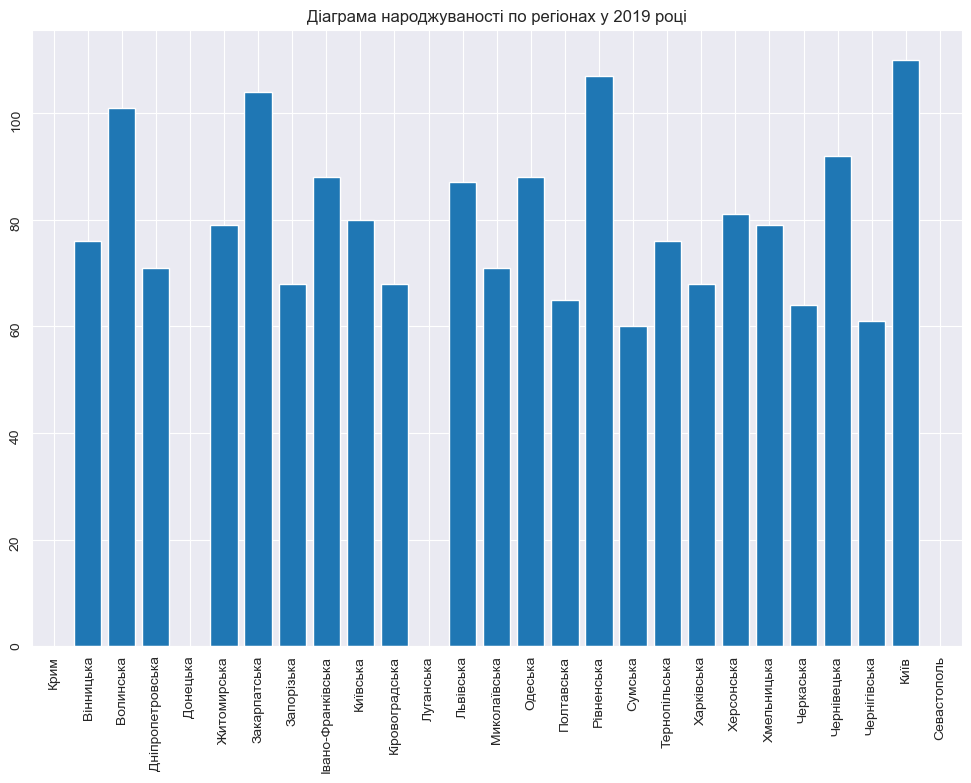

In [13]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
plt.bar(df['Регіон'], df['2019'])
plt.title('Діаграма народжуваності по регіонах у 2019 році')
plt.tick_params(labelrotation = 90)
plt.show()

In [ ]:
#====================================
#====================================Домашнє завдання модуля 3 (візуалізаціія даних)
#====================================

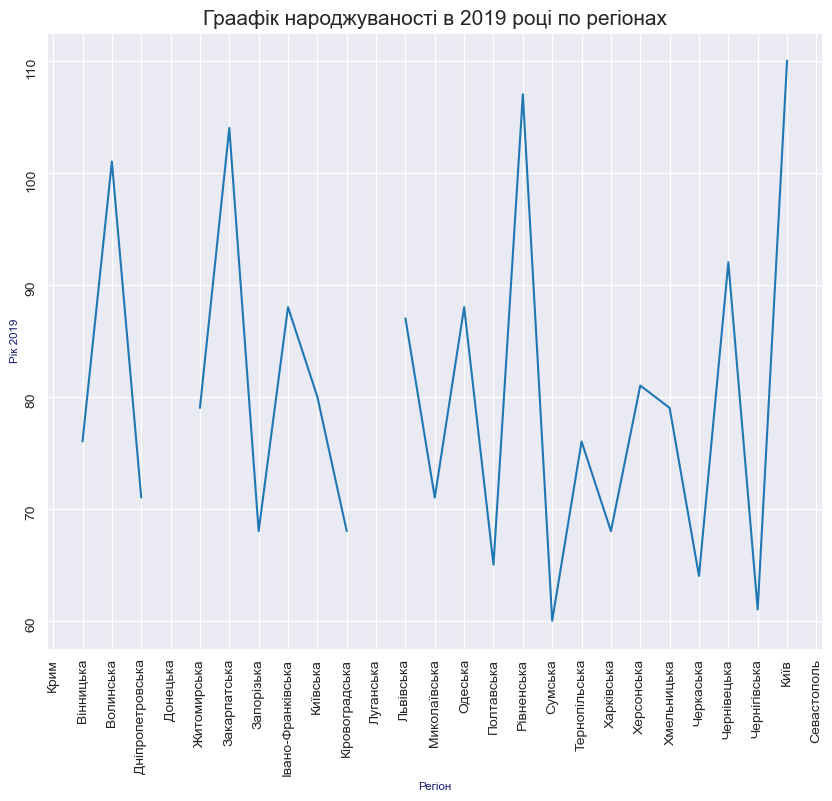

In [21]:
%matplotlib inline
plt.figure(figsize = (10,8))
plt.tick_params(labelrotation = 90)
plt.plot(df['Регіон'], df['2019'])
plt.xlabel('Регіон', fontsize='small', color='midnightblue')
plt.ylabel('Рік 2019', fontsize='small', color='midnightblue')
plt.title('Граафік народжуваності в 2019 році по регіонах', fontsize=15)
plt.show()

<Figure size 1000x800 with 0 Axes>

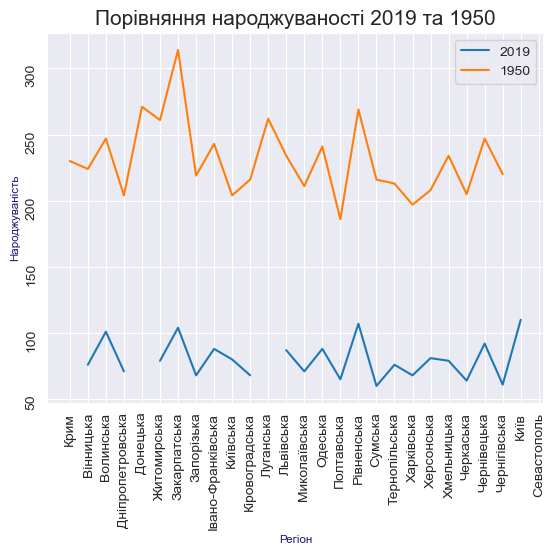

In [37]:
%matplotlib inline
plt.figure(figsize = (10,8))
fig, axs = plt.subplots()
axs.plot(df['Регіон'], df['2019'], label='2019')
axs.plot(df['Регіон'], df['1950'], label='1950')
plt.xlabel('Регіон', fontsize='small', color='midnightblue')
plt.ylabel('Народжуваність', fontsize='small', color='midnightblue')
plt.title('Порівняння народжуваності 2019 та 1950', fontsize=15)
plt.tick_params(labelrotation = 90)
plt.legend()
plt.show()

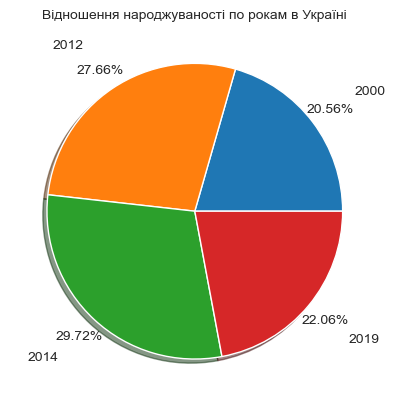

In [58]:
%matplotlib inline

plt.title('Відношення народжуваності по рокам в Україні', fontsize=10)

a = df['2019'].max()
b = df['2014'].max()
c = df['2012'].max()
d = df['2000'].max()

labels = ['2000','2012','2014','2019']

data = [a, b, c, d]
# explode = [1, 1, 1, 1]
plt.pie(
    data,
    labels=labels,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()